## 李航统计学习方法-例题 

# 第一章：统计方法概论

高斯于1823年在误差e1 ,… , en独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
前提条件是：无偏的线性估计


### 使用最小二乘法拟和曲线

对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.optimize import leastsq
%matplotlib inline

举例是这样，使用一个正弦函数，$sin2{\pi}x$加上一个正态分布噪音项

*ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [112]:
# 真实函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差值

def residuals_func(canshu,x,y):
    """ canshu是多项式的系数，w b,x是样本  y是样本值  """
    
    ret = fit_func(canshu,x)-y
    print('ret',ret.shape)
    print('ret',ret.sum())

    return ret 



In [103]:
import warnings 
warnings.filterwarnings('ignore')

x = np.linspace(0,1,10)
x_points = np.linspace(0,1,1000)

# 随机的扰动

y_real = real_func(x)

y = [np.random.normal(0,0.1)+ y_ for y_ in y_real ]


# fitting函数  

# 设置多项式的次数为M  则参数为M+1 个

def fitting(M):
    xishu =  np.random.rand(M+1)
    print('xishu',xishu)

    # 这个函数需要自定义一个loss函数，通过最小二乘不断的去拟合
    canshu = leastsq(residuals_func,xishu,args=(x,y))
    print()
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(canshu[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return canshu



xishu [0.49858186]


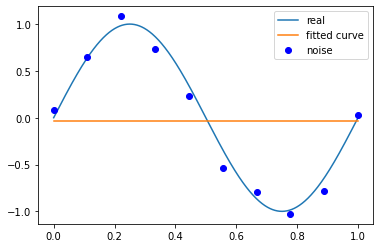

In [80]:
M = 0 # 最高3次方 
canshu = fitting(M)

xishu [0.87193267 0.61730503 0.52006037]


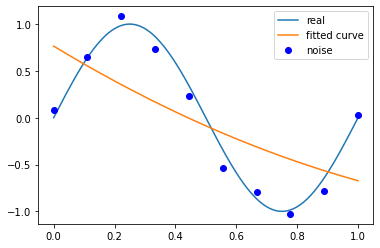

In [81]:
M = 2 # 最高3次方 
canshu = fitting(M)

xishu [0.11333283 0.11967096 0.51525733 0.99564664 0.86769241 0.26076203
 0.83470378 0.45124515 0.30927216 0.2535969 ]
ret (10,)
ret 13.467541506247944
ret (10,)
ret 13.467541506247944
ret (10,)
ret 13.467541506247944
ret (10,)
ret 13.467541508751376
ret (10,)
ret 13.467541509053754
ret (10,)
ret 13.467541519219164
ret (10,)
ret 13.467541533562173
ret (10,)
ret 13.46754153270431
ret (10,)
ret 13.467541515328692
ret (10,)
ret 13.467541540798099
ret (10,)
ret 13.467541529906732
ret (10,)
ret 13.467541529290514
ret (10,)
ret 13.467541544036825
ret (10,)
ret 6.536007885818429e-07
ret (10,)
ret 2.068359988317836e-06
ret (10,)
ret 4.406003852243379e-06
ret (10,)
ret 1.9142070852642967e-06
ret (10,)
ret 3.6761714296909553e-06
ret (10,)
ret 2.017135602751241e-06
ret (10,)
ret 1.6550044341992476e-06
ret (10,)
ret 1.571064729012639e-06
ret (10,)
ret 1.766957904471289e-06
ret (10,)
ret 1.2687705167949148e-06
ret (10,)
ret 6.539817301101647e-07
ret (10,)
ret -2.111741791467614e-06
ret (10,)
ret 1.

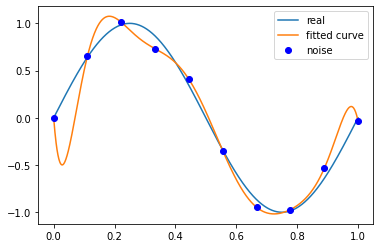

In [113]:
M = 9 # 过拟合的问题
canshu = fitting(M)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

# 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

### 这里我不是很理解，概念，参数向量的L2范数是个啥东西，也可以是L1范数，
范数的什么？先放上这篇博文，这是我感觉比较好的
https://zhuanlan.zhihu.com/p/28023308

- L0范数是指向量中非0的元素的个数。(L0范数很难优化求解)

- L1范数是指向量中各个元素绝对值之和

- L2范数是指向量各元素的平方和然后求平方根

- L1范数可以进行特征选择，即让特征的系数变为0.

- L2范数可以防止过拟合，提升模型的泛化能力，有助于处理 condition number不好下的矩阵(数据变化很小矩阵求解后结果变化很大)

- （核心：L2对大数，对outlier离群点更敏感！）

- 下降速度：最小化权值参数L1比L2变化的快

- 模型空间的限制：L1会产生稀疏 L2不会。

- L1会趋向于产生少量的特征，而其他的特征都是0，而L2会选择更多的特征，这些特征都会接近于0。


# 观察L1和L2正则化的不同效果

In [98]:
a = np.array([1,2,3])
np.sqrt(0.5*regulazation*np.square(a))
np.sqrt(a) # 开方啊

array([1.        , 1.41421356, 1.73205081])

(array([ -8.00925284,  -1.57450983,   3.94480023,   7.52314187,
          7.79845006,   3.33696984,  -6.11249316, -14.59476991,
          7.64479794,   0.01527301]),
 1)

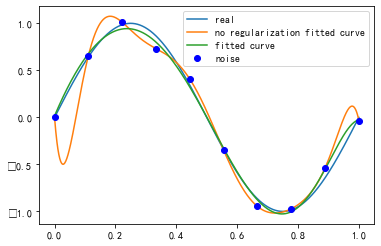

In [163]:
regulazation = 0.0001
def L2_regularization_dif(canshu,x,y):
    """ L2正则项"""
    ret = fit_func(canshu,x) - y 
#     print('ret1',ret.shape)
#     print('ret1',ret)
    ret = np.append(ret,np.sqrt(regulazation*np.square(canshu)))
#     print('ret2',ret.shape)
#     print('ret2',ret)
    return ret
xishu = np.random.rand(9+1)
canshu_L2 = leastsq(L2_regularization_dif,xishu,args=(x,y))
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(canshu[0], x_points), label='no regularization fitted curve')
plt.plot(x_points, fit_func(canshu_L2[0], x_points), label='fitted curve')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
# 可以观察出来差值虽然很小但是并为 0，或者说并不非常接近0
canshu_re

- L1正则

(array([ 5.31379942e+01, -1.31236172e+02,  3.09794583e+01,  9.97608630e+01,
        -2.66306523e+01, -3.59144685e+01,  2.26537881e+01, -2.10115567e+01,
         8.22709765e+00, -2.43180053e-03]),
 1)

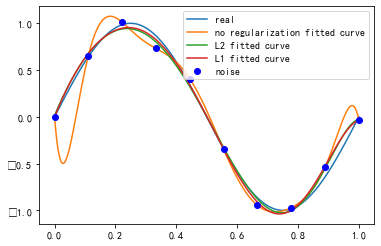

In [171]:
def L1_regularization(canshu,x,y):
    ret = fit_func(canshu,x) - y
    #正则化
    ret = np.append(ret,np.abs(canshu)*regulazation)
#     print('ret.shape',ret.shape)
#     print('ret',ret)
    return ret
xishu = np.random.rand(9+1)
canshu_L1 = leastsq(L1_regularization,xishu,args=(x,y))

plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(canshu[0], x_points), label='no regularization fitted curve')
plt.plot(x_points, fit_func(canshu_L2[0], x_points), label='L2 fitted curve')
plt.plot(x_points, fit_func(canshu_L1[0], x_points), label='L1 fitted curve')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
canshu_L1

- 需要注意的地方，每次返回样本与真实值的ret，差值的维度，输入x的维度是一样的
- 正则化化是对参数的正则化，正则的结果维度与参数的维度一致 与样本的数量无关
- 同时正则的惩罚系数也很重要，如果权重过大则拟合效果会很差，模型会非常简单甚至变成一条直线

无正则参数-mean -0.0034781832504239287
无正则参数-max 164477.22112383263
无正则参数-min -151036.59566811126
无正则参数 [-1.60486938e+04  7.58387046e+04 -1.51036596e+05  1.64477221e+05
 -1.06248927e+05  4.12851434e+04 -9.29772679e+03  1.07225980e+03
 -4.14215521e+01  8.54328277e-04]


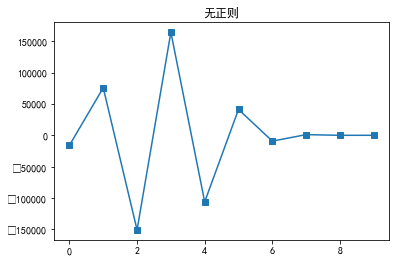

L2正则参数-mean -0.0027592782724105264
L2正则参数-max 7.798452298927235
L2正则参数-min -14.594772848775115
L2正则参数 [ -8.00925377  -1.57450234   3.94479147   7.5231425    7.7984523
   3.33696596  -6.11248747 -14.59477285   7.64479841   0.015273  ]


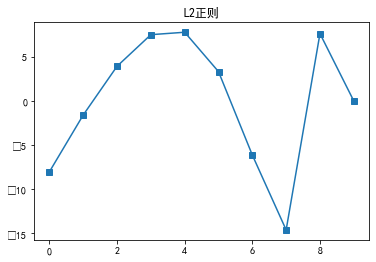

L1正则参数-mean -0.003607986747722125
L1正则参数-max 99.76086297643064
L1正则参数-min -131.2361718413381
L1正则参数 [ 5.31379942e+01 -1.31236172e+02  3.09794583e+01  9.97608630e+01
 -2.66306523e+01 -3.59144685e+01  2.26537881e+01 -2.10115567e+01
  8.22709765e+00 -2.43180053e-03]


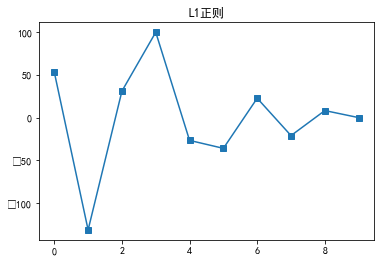

In [172]:
import matplotlib
matplotlib.rcParams['font.family'] = ['Simhei']
print('无正则参数-mean',canshu[0].mean())
print('无正则参数-max',canshu[0].max())
print('无正则参数-min',canshu[0].min())
print('无正则参数',canshu[0])
plt.plot(canshu[0],marker='s')
plt.title('无正则')
plt.show()
print('L2正则参数-mean',canshu_L2[0].mean())
print('L2正则参数-max',canshu_L2[0].max())
print('L2正则参数-min',canshu_L2[0].min())
print('L2正则参数',canshu_L2[0])
plt.plot(canshu_L2[0],marker='s')
plt.title('L2正则')
plt.show()
print('L1正则参数-mean',canshu_L1[0].mean())
print('L1正则参数-max',canshu_L1[0].max())
print('L1正则参数-min',canshu_L1[0].min())
print('L1正则参数',canshu_L1[0])
plt.plot(canshu_L1[0],marker='s')
plt.title('L1正则')
plt.show()